In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing  import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
df=pd.read_csv("ElecDeviceRatingPrediction.csv")
electro = df.copy()
electro.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Pentium Quad,Not Available,4 GB,LPDDR4X,0 GB,512 GB,64-bit Windows,0 GB,Casual,No warranty,No,No,45990,3 stars,0,0
1,ASUS,Intel,Core i5,10th,8 GB,LPDDR4,0 GB,512 GB,32-bit DOS,4 GB,Casual,No warranty,No,No,106167,4 stars,1881,241
2,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,64-bit Windows,0 GB,Casual,No warranty,No,No,22990,3 stars,0,0
3,Lenovo,Intel,Core i3,11th,4 GB,DDR4,256 GB,0 GB,64-bit Windows,0 GB,Casual,1 year,No,Yes,44990,4 stars,42,4
4,HP,AMD,Ryzen 7,Not Available,16 GB,DDR4,512 GB,0 GB,64-bit Windows,2 GB,Casual,1 year,No,Yes,79990,3 stars,23,6


In [40]:
#check the datatypes
print(electro.dtypes)

brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object


In [41]:
electro['ram_gb']=electro['ram_gb'].str.strip('GB')


In [42]:
meanValue_ratings = electro['Number of Ratings'].mean()
electro['Number of Ratings']=electro['Number of Ratings'].replace(0, meanValue_ratings)
electro['Number of Ratings']=electro['Number of Ratings'].astype('int')

In [43]:
electro['reviews per rating']= electro['Number of Reviews']/electro['Number of Ratings']

In [44]:
electro['reviews - rating']= electro['Number of Reviews']-electro['Number of Ratings']

In [45]:
electro['reviews + rating']= electro['Number of Reviews']+electro['Number of Ratings']

In [46]:
electro['reviews * rating']= electro['Number of Reviews']*electro['Number of Ratings']

In [47]:
electro

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,...,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews,reviews per rating,reviews - rating,reviews + rating,reviews * rating
0,ASUS,Intel,Pentium Quad,Not Available,4,LPDDR4X,0 GB,512 GB,64-bit Windows,0 GB,...,No,No,45990,3 stars,301,0,0.000000,-301,301,0
1,ASUS,Intel,Core i5,10th,8,LPDDR4,0 GB,512 GB,32-bit DOS,4 GB,...,No,No,106167,4 stars,1881,241,0.128123,-1640,2122,453321
2,ASUS,Intel,Celeron Dual,Not Available,4,DDR4,0 GB,512 GB,64-bit Windows,0 GB,...,No,No,22990,3 stars,301,0,0.000000,-301,301,0
3,Lenovo,Intel,Core i3,11th,4,DDR4,256 GB,0 GB,64-bit Windows,0 GB,...,No,Yes,44990,4 stars,42,4,0.095238,-38,46,168
4,HP,AMD,Ryzen 7,Not Available,16,DDR4,512 GB,0 GB,64-bit Windows,2 GB,...,No,Yes,79990,3 stars,23,6,0.260870,-17,29,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,Lenovo,Intel,Core i3,11th,4,DDR4,256 GB,0 GB,64-bit Windows,0 GB,...,No,No,39998,4 stars,10,1,0.100000,-9,11,10
719,HP,Intel,Core i3,11th,8,DDR4,512 GB,0 GB,64-bit Windows,0 GB,...,No,No,44990,3 stars,301,0,0.000000,-301,301,0
720,Lenovo,Intel,Core i5,11th,8,DDR4,512 GB,0 GB,64-bit Windows,0 GB,...,Yes,Yes,64990,4 stars,48,12,0.250000,-36,60,576
721,MSI,Intel,Core i5,10th,8,LPDDR4,0 GB,512 GB,32-bit DOS,8 GB,...,No,No,179990,4 stars,24,5,0.208333,-19,29,120


In [48]:
print(electro.dtypes)

brand                  object
processor_brand        object
processor_name         object
processor_gnrtn        object
ram_gb                 object
ram_type               object
ssd                    object
hdd                    object
os                     object
graphic_card_gb        object
weight                 object
warranty               object
Touchscreen            object
msoffice               object
Price                   int64
rating                 object
Number of Ratings       int32
Number of Reviews       int64
reviews per rating    float64
reviews - rating        int64
reviews + rating        int64
reviews * rating        int64
dtype: object


In [49]:
mode_value = electro['processor_gnrtn'].mode()[0]

print(mode_value)

11th


In [50]:
#convert to the correct datatype
electro['Touchscreen']=electro['Touchscreen'].astype('category')
electro['msoffice']=electro['msoffice'].astype('category')
electro['rating']=electro['rating'].str.strip('stars')
electro['rating']=electro['rating'].astype('int')

electro['ram_gb']=electro['ram_gb'].astype('int')
electro['ssd']=electro['ssd'].str.strip('GB')
electro['ssd']=electro['ssd'].astype('int')
electro['hdd']=electro['hdd'].str.strip('GB')
electro['hdd']=electro['hdd'].astype('int')
electro['processor_brand']=electro['processor_brand'].astype('category')
electro['brand']=electro['brand'].astype('category')
electro['processor_name']=electro['processor_name'].astype('category')
electro['ram_type']=electro['ram_type'].astype('category')
electro['os']=electro['os'].astype('category')
electro['weight']=electro['weight'].astype('category')
electro['graphic_card_gb']=electro['graphic_card_gb'].str.strip('GB')
electro['graphic_card_gb']=electro['graphic_card_gb'].astype('int')
electro['warranty']=electro['warranty'].str.strip('year || years')
electro['warranty']=electro['warranty'].str.replace('No warrant','0')
electro['warranty']=electro['warranty'].astype('int')
electro['processor_gnrtn']=electro['processor_gnrtn'].str.replace('Not Available',mode_value)
electro['processor_gnrtn']=electro['processor_gnrtn'].str.strip('th')


In [51]:
print('unique values of ram type : ',electro['ram_type'].unique())

unique values of ram type :  ['LPDDR4X', 'LPDDR4', 'DDR4', 'DDR3', 'DDR5', 'LPDDR3']
Categories (6, object): ['DDR3', 'DDR4', 'DDR5', 'LPDDR3', 'LPDDR4', 'LPDDR4X']


In [52]:
#manually encoding ram type
manual_encoding = {}
for category in electro['ram_type'].unique():
    if(category == 'DDR5'):
        manual_encoding[category] = 5
    elif(category == 'LPDDR4X'):
        manual_encoding[category] = 4
    elif(category == 'LPDDR4'):
        manual_encoding[category] = 3
    elif(category == 'DDR4'):
        manual_encoding[category] = 2
    elif(category == 'LPDDR3'):
        manual_encoding[category] = 1
    else:
        manual_encoding[category] = 0

print(manual_encoding)

{'LPDDR4X': 4, 'LPDDR4': 3, 'DDR4': 2, 'DDR3': 0, 'DDR5': 5, 'LPDDR3': 1}


In [53]:
electro.loc[electro['processor_gnrtn'] == '0' , 'processor_gnrtn'] = electro['processor_gnrtn'].value_counts().idxmax()
electro['processor_gnrtn']=electro['processor_gnrtn'].astype('int')

In [54]:
print('unique values of processor_gnrtn : ',electro['processor_gnrtn'].unique())

unique values of processor_gnrtn :  [11 10  8  7 12  9  4]


In [55]:
#check the ranges
print(electro.describe())

       processor_gnrtn      ram_gb          ssd          hdd  graphic_card_gb  \
count       723.000000  723.000000   723.000000   723.000000       723.000000   
mean         10.535270    8.724758   449.150761   232.984786         1.208852   
std           0.863102    4.439221   318.015040   416.286290         2.053125   
min           4.000000    4.000000     0.000000     0.000000         0.000000   
25%          10.000000    4.000000   256.000000     0.000000         0.000000   
50%          11.000000    8.000000   512.000000     0.000000         0.000000   
75%          11.000000    8.000000   512.000000   512.000000         2.000000   
max          12.000000   32.000000  3072.000000  2048.000000         8.000000   

         warranty          Price      rating  Number of Ratings  \
count  723.000000     723.000000  723.000000         723.000000   
mean     0.716459   77031.348548    3.553250         395.305671   
std      0.605691   45706.444883    0.562813         951.126626   
mi

In [56]:
electro.dtypes

brand                 category
processor_brand       category
processor_name        category
processor_gnrtn          int32
ram_gb                   int32
ram_type              category
ssd                      int32
hdd                      int32
os                    category
graphic_card_gb          int32
weight                category
warranty                 int32
Touchscreen           category
msoffice              category
Price                    int64
rating                   int32
Number of Ratings        int32
Number of Reviews        int64
reviews per rating     float64
reviews - rating         int64
reviews + rating         int64
reviews * rating         int64
dtype: object

In [57]:
#check for duplicates
duplicates = electro.duplicated(keep=False)
print('no. of duplicates : ',duplicates.sum())

no. of duplicates :  30


In [58]:
#drop the duplicates
electro.drop_duplicates(inplace=True)

In [59]:
#check if they are deleted
duplicates = electro.duplicated(keep=False).sum()
print('no. of duplicates : ',duplicates)

no. of duplicates :  0


In [60]:
#check if there is any device doesn't have any processor
print(electro[(electro['ssd']==0) & (electro['hdd']==0)])

Empty DataFrame
Columns: [brand, processor_brand, processor_name, processor_gnrtn, ram_gb, ram_type, ssd, hdd, os, graphic_card_gb, weight, warranty, Touchscreen, msoffice, Price, rating, Number of Ratings, Number of Reviews, reviews per rating, reviews - rating, reviews + rating, reviews * rating]
Index: []

[0 rows x 22 columns]


In [61]:
#check missing data
print('NULLS : \n',electro.isna().sum())

NULLS : 
 brand                 0
processor_brand       0
processor_name        0
processor_gnrtn       0
ram_gb                0
ram_type              0
ssd                   0
hdd                   0
os                    0
graphic_card_gb       0
weight                0
warranty              0
Touchscreen           0
msoffice              0
Price                 0
rating                0
Number of Ratings     0
Number of Reviews     0
reviews per rating    0
reviews - rating      0
reviews + rating      0
reviews * rating      0
dtype: int64


In [62]:
print('data types : \n',electro.dtypes)

data types : 
 brand                 category
processor_brand       category
processor_name        category
processor_gnrtn          int32
ram_gb                   int32
ram_type              category
ssd                      int32
hdd                      int32
os                    category
graphic_card_gb          int32
weight                category
warranty                 int32
Touchscreen           category
msoffice              category
Price                    int64
rating                   int32
Number of Ratings        int32
Number of Reviews        int64
reviews per rating     float64
reviews - rating         int64
reviews + rating         int64
reviews * rating         int64
dtype: object


In [63]:
#label encoding for features with natural order 
label_encoder = LabelEncoder()  
electro['weight']= label_encoder.fit_transform(electro['weight'])
electro['msoffice'] = label_encoder.fit_transform(electro['msoffice'])
electro['ram_type'] = label_encoder.fit_transform(electro['ram_type'])
electro['Touchscreen'] = label_encoder.fit_transform(electro['Touchscreen'])


In [64]:
categoricalData = pd.DataFrame()
categoricalData['weight'] = electro['weight']
categoricalData['brand'] = electro['brand']
categoricalData['processor_brand'] = electro['processor_brand']
categoricalData['processor_name'] = electro['processor_name']
categoricalData['os'] = electro['os']
categoricalData['Touchscreen'] = electro['Touchscreen']
categoricalData['msoffice'] = electro['msoffice']
categoricalData['ram_type'] = electro['ram_type']
#one hot encoding
categoricalData = pd.get_dummies(categoricalData,columns=['brand','processor_brand','processor_name','os','Touchscreen'],dtype=int)

In [65]:
#one hot encoding for categories with no order
electro=pd.get_dummies(electro,columns=['brand','processor_brand','processor_name','os'],dtype=int)

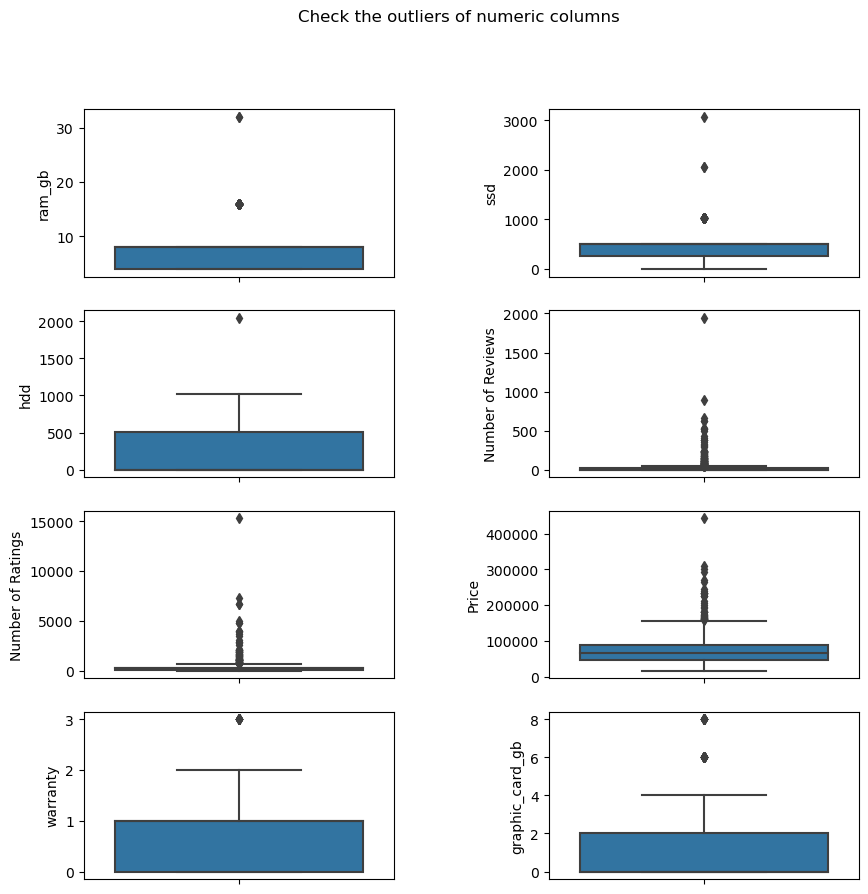

In [66]:
#check the outliers
fig, axes = plt.subplots(4,2,sharex=True,figsize=(10, 10))
fig.suptitle('Check the outliers of numeric columns')
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(data=electro, y='ram_gb', ax=axes[0,0])
sns.boxplot(data=electro, y='ssd', ax=axes[0,1])
sns.boxplot(data=electro, y='hdd', ax=axes[1,0])
sns.boxplot(data=electro, y='Number of Reviews', ax=axes[1,1])
sns.boxplot(data=electro, y='Number of Ratings', ax=axes[2,0])
sns.boxplot(data=electro, y='Price', ax=axes[2,1])
sns.boxplot(data=electro, y='warranty', ax=axes[3,0])
sns.boxplot(data=electro, y='graphic_card_gb', ax=axes[3,1])
plt.show()

In [67]:
#drop the outliers
for col in electro.columns:
        #print("capping the ",col)
        if (((electro[col].dtype)=='float') | ((electro[col].dtype)=='int32')|((electro[col].dtype)=='int64')):
            percentiles = electro[col].quantile([0.25,0.75]).values
            iqr= percentiles[1]-percentiles[0]
            electro[col][electro[col] <= percentiles[0]-1.5*iqr] = percentiles[0]#-1.5*iqr
            electro[col][electro[col] >= percentiles[1]+1.5*iqr] = percentiles[1]#+1.5*iqr
        else:
            electro[col]=electro[col]


C:\Users\DELL\AppData\Local\Temp\ipykernel_154200\1072674879.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electro[col][electro[col] <= percentiles[0]-1.5*iqr] = percentiles[0]-1.5*iqr
C:\Users\DELL\AppData\Local\Temp\ipykernel_154200\1072674879.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electro[col][electro[col] <= percentiles[0]-1.5*iqr] = percentiles[0]-1.5*iqr
C:\Users\DELL\AppData\Local\Temp\ipykernel_154200\1072674879.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [68]:
electro.dtypes

processor_gnrtn                float64
ram_gb                           int32
ram_type                         int32
ssd                              int32
hdd                              int32
graphic_card_gb                  int32
weight                           int32
warranty                       float64
Touchscreen                      int32
msoffice                         int32
Price                            int64
rating                         float64
Number of Ratings              float64
Number of Reviews              float64
reviews per rating             float64
reviews - rating               float64
reviews + rating               float64
reviews * rating               float64
brand_APPLE                      int32
brand_ASUS                       int32
brand_Avita                      int32
brand_DELL                       int32
brand_HP                         int32
brand_Lenovo                     int32
brand_MSI                        int32
brand_acer               

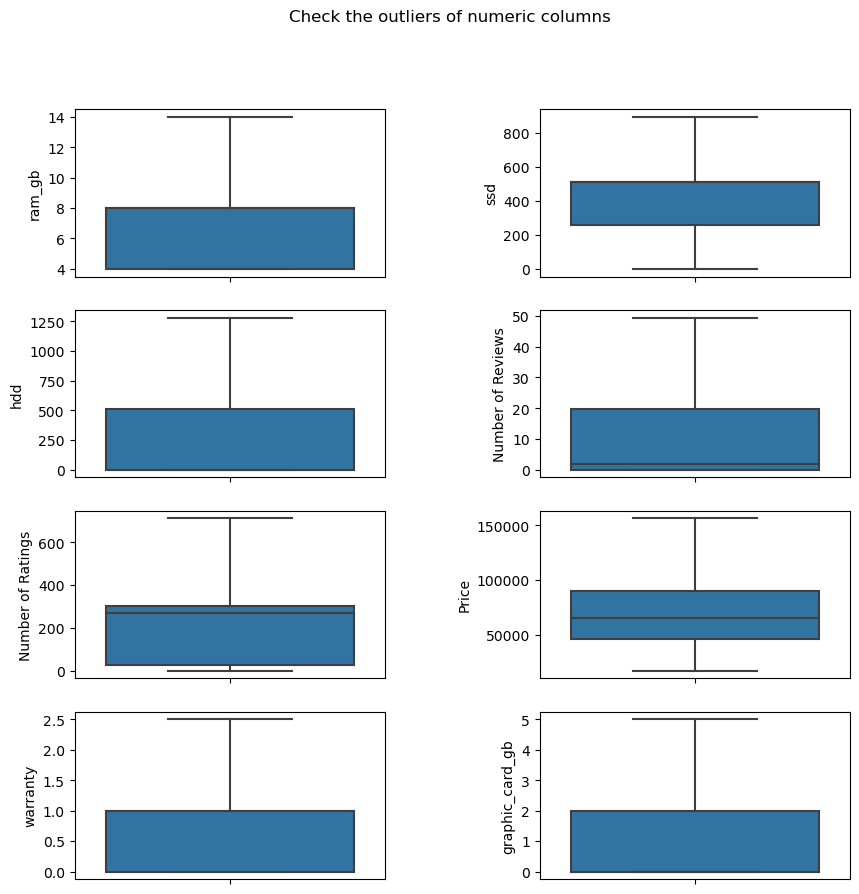

In [69]:
#check the outliers
fig, axes = plt.subplots(4,2,sharex=True,figsize=(10, 10))
fig.suptitle('Check the outliers of numeric columns')
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(data=electro, y='ram_gb', ax=axes[0,0])
sns.boxplot(data=electro, y='ssd', ax=axes[0,1])
sns.boxplot(data=electro, y='hdd', ax=axes[1,0])
sns.boxplot(data=electro, y='Number of Reviews', ax=axes[1,1])
sns.boxplot(data=electro, y='Number of Ratings', ax=axes[2,0])
sns.boxplot(data=electro, y='Price', ax=axes[2,1])
sns.boxplot(data=electro, y='warranty', ax=axes[3,0])
sns.boxplot(data=electro, y='graphic_card_gb', ax=axes[3,1])
plt.show()

In [70]:
#split to features and result
X = electro.drop(columns=['rating'])
Y = electro['rating']

In [71]:
Y_categorical = electro['rating']
scaler =  MinMaxScaler(feature_range=(0,1))
X= pd.DataFrame(scaler.fit_transform(X),index=X.index,columns= X.columns)

In [72]:
print('unique values of rating : ',electro['rating'].unique())

unique values of rating :  [3.  4.  5.  2.  1.5]


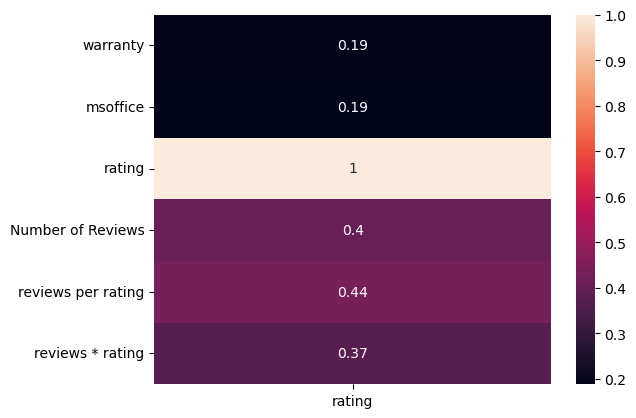

,rating
warranty,0.193593
msoffice,0.188051
rating,1.000000
Number of Reviews,0.404772
reviews per rating,0.435077
reviews * rating,0.373860


In [73]:
#check the best features with Y
corr = electro.corr()
top_feature = corr.loc[abs(corr['rating'])>0.15,'rating']
top_feature=pd.DataFrame(top_feature)
sns.heatmap(top_feature,annot=True)
plt.show()
top_feature

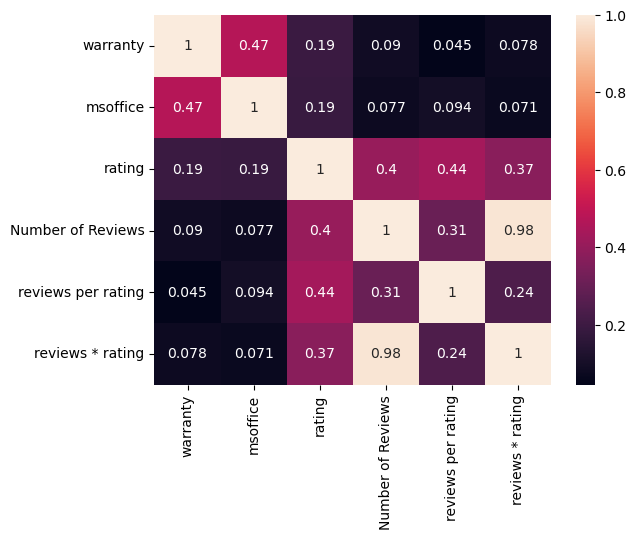

In [74]:
sns.heatmap(electro[top_feature.index].corr(),annot=True)
plt.show()

In [75]:
Y=electro['rating']
top_feature = top_feature.drop('rating')

#top_feature
first_X= X[top_feature.index]

In [76]:
best_features = SelectKBest(score_func=chi2, k=3)
fit = best_features.fit(categoricalData, Y_categorical)

# Summarize scores
chi_scores = pd.DataFrame(fit.scores_, columns=["Chi-Square Score"])
columns = pd.DataFrame(categoricalData.columns, columns=["Feature"])
chi_summary = pd.concat([columns, chi_scores], axis=1)

print("Chi-Square scores:\n", chi_summary)

In [77]:
# # Calculate information gain for each feature
# info_gain = mutual_info_regression(X, Y)

# # Select features with information gain greater than 0.15
# top_feature_idx = np.where(info_gain > 0.15)[0]
# top_feature_names = X.columns[top_feature_idx]
# top_feature_df = pd.DataFrame(data=info_gain[top_feature_idx], index=top_feature_names, columns=['Information Gain'])

# plt.figure(figsize=(12, 6))
# plt.bar(X.columns, info_gain,width=0.5)
# plt.xticks(rotation = 90)
# plt.xlabel('Features')
# plt.ylabel('Information Gain')
# plt.title('Information Gain for Feature Selection')
# plt.show()
# print('Top features of info gain',top_feature_df)
# third_feature_selection = X[top_feature_df.index]
# print('info gain features : \n',third_feature_selection)

In [78]:
#linear regression model
X_train, X_test, y_train, y_test = train_test_split(first_X, Y, test_size=0.25, random_state= 104, shuffle = True)



model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
y_pred_train = model.predict(X_train)
mse = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)
print("Mean Squared Error (linear regression):", mse)
print("Mean Squared Error of train (linear regression):", mse_train)

print("R^2 Score (linear regression):", r2)
print("R^2 Score train (linear regression):", r2_train)


cv_mse = -cross_val_score(model, first_X, Y, cv=10, scoring='neg_mean_squared_error')
print("Cross-Validation Mean Squared Error (linear regression):", cv_mse.mean())

cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(model, first_X, Y, 
                         cv=cv)

print("Accuracy (linear regression): " ,scores.mean())


Mean Squared Error (linear regression): 0.20039782459920089
Mean Squared Error of train (linear regression): 0.226350534053349
R^2 Score (linear regression): 0.3246274261114066
R^2 Score train (linear regression): 0.28134196586067284
Cross-Validation Mean Squared Error (linear regression): 0.22158909343674543
Accuracy (linear regression):  0.2816907317154997


In [79]:
#ridge regression model
model = Ridge(alpha=10)
model.fit(X_train, y_train)
y_ridge = model.predict(X_test)
y_ridge_train = model.predict(X_train)
mse_ridge = mean_squared_error(y_test, y_ridge)
mse_ridge_train = mean_squared_error(y_train, y_ridge_train)

r2_ridge = r2_score(y_test, y_ridge)


print("Mean Squared Error (ridge regression):", mse_ridge)
print("Mean Squared Error of train (ridge regression):", mse_ridge_train)
print("R^2 Score (ridge regression):", r2_ridge)

cv_mse_ridge = -cross_val_score(model, first_X, Y, cv=10, scoring='neg_mean_squared_error')
print("Cross-Validation Mean Squared Error (ridge regression):", cv_mse_ridge.mean())

cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, first_X, Y, 
                         cv=cv)

print("Accuracy (ridge regression): " ,scores.mean())


Mean Squared Error (ridge regression): 0.2087700903811708
Mean Squared Error of train (ridge regression): 0.2281790637209659
R^2 Score (ridge regression): 0.29641155749228687
Cross-Validation Mean Squared Error (ridge regression): 0.2221410433041692
Accuracy (ridge regression):  0.27977607045462155


In [80]:
#lasso regression model
model = Lasso(alpha=0.001)
model.fit(X_train, y_train)
y_lasso = model.predict(X_test)
y_lasso_train = model.predict(X_train)

mse_lasso = mean_squared_error(y_test, y_lasso)
mse_lasso_train = mean_squared_error(y_train, y_lasso_train)

r2_lasso = r2_score(y_test, y_lasso)


print("Mean Squared Error (lasso regression):", mse_lasso)
print("Mean Squared Error of train (lasso regression):", mse_lasso_train)
print("R^2 Score (lasso regression):", r2_lasso)

cv_mse_lasso = -cross_val_score(model, first_X, Y, cv=10, scoring='neg_mean_squared_error')
print("Cross-Validation Mean Squared Error (lasso regression):", cv_mse_lasso.mean())

cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, first_X, Y, 
                         cv=cv)

print("Accuracy (lasso regression) : " ,scores.mean())

Mean Squared Error (lasso regression): 0.20155386850749327
Mean Squared Error of train (lasso regression): 0.22643460638406157
R^2 Score (lasso regression): 0.3207313740887202
Cross-Validation Mean Squared Error (lasso regression): 0.2209977745038385
Accuracy (lasso regression) :  0.282768250209467


In [81]:
regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

regressor.fit(X_train, y_train)


prediction_GB = regressor.predict(X_test)
prediction_train_GB = model.predict(X_train)
mse_GB = mean_squared_error(y_test, prediction_GB)
mse_GB_train = mean_squared_error(y_train, prediction_train_GB)

r2_GB = r2_score(y_test, prediction_GB)
r2_train_GB = r2_score(y_train, prediction_train_GB)



mse_GB = cross_val_score(regressor, first_X, Y, cv=10, scoring='neg_mean_squared_error')




print("Mean Squared Error of train (GradientBoost):", mse_GB_train)
print("R^2 Score (GradientBoost) :", r2_GB)
print("R^2 Score train (GradientBoost):", r2_train_GB)





mse_mean_GB = -mse_GB.mean()
print("Mean Squared Error (GradientBoost):", mse_mean_GB)
cv_GB = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(regressor, first_X, Y, 
                         cv=cv_GB, scoring ='r2')

print("Accuracy (GradientBoost) : " ,scores.mean())

Mean Squared Error of train (GradientBoost): 0.22643460638406157
R^2 Score (GradientBoost) : 0.35109911394604365
R^2 Score train (GradientBoost): 0.28107503803490874
Mean Squared Error (GradientBoost): 0.21741026889230053
Accuracy (GradientBoost) :  0.32482857071934373


In [82]:
regressor = RandomForestRegressor(n_estimators=100, random_state=5)


regressor.fit(X_train, y_train)


prediction_RF = regressor.predict(X_test)

prediction_train_RF = model.predict(X_train)
mse_RF = mean_squared_error(y_test, prediction_RF)
mse_RF_train = mean_squared_error(y_train, prediction_train_RF)

r2_RF = r2_score(y_test, prediction_RF)
r2_train_RF = r2_score(y_train, prediction_train_RF)

cv_mse_RF = -cross_val_score(regressor, first_X, Y, cv=10, scoring='neg_mean_squared_error')
print("Cross-Validation Mean Squared Error (RandomForest):", cv_mse_RF.mean())



print("Mean Squared Error (RandomForest):", mse_RF)
print("Mean Squared Error of train (RandomForest):", mse_RF_train)
print("R^2 Score (RandomForest):", r2_RF)
print("R^2 Score train (RandomForest):", r2_train_RF)


cv_RF = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(regressor, first_X, Y, 
                         cv=cv_RF, scoring ='r2')

print("Accuracy (RandomForest): " ,scores.mean())


Cross-Validation Mean Squared Error (RandomForest): 0.22772288094492846
Mean Squared Error (RandomForest): 0.23294951736754463
Mean Squared Error of train (RandomForest): 0.22643460638406157
R^2 Score (RandomForest): 0.2149230389836697
R^2 Score train (RandomForest): 0.28107503803490874
Accuracy (RandomForest):  0.27185580697869355


In [83]:
#polynomial regression
polynomial_features = PolynomialFeatures(degree=2)
first_X_poly = polynomial_features.fit_transform(X_train)
first_X_poly_test = polynomial_features.fit_transform(X_test)


model = LinearRegression()
model.fit(first_X_poly, y_train)
y_poly_pred = model.predict(first_X_poly_test)
y_poly_train = model.predict(first_X_poly)
mse_poly = mean_squared_error(y_test, y_poly_pred)
mse_poly_train = mean_squared_error(y_train, y_poly_train)

r2_poly = r2_score(y_test, y_poly_pred)


print("Mean Squared Error (polynomial regression):", mse_poly)
print("Mean Squared Error of train (polynomial regression):", mse_poly_train)
print("R^2 Score (polynomial regression):", r2_lasso)

cv_mse_poly = -cross_val_score(model, first_X, Y, cv=10, scoring='neg_mean_squared_error')
print("Cross-Validation Mean Squared Error:", cv_mse_poly.mean())

cv_poly = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, first_X, Y, 
                         cv=cv_poly)

print("Accuracy : " ,scores.mean())

Mean Squared Error (polynomial regression): 0.1803184406743855
Mean Squared Error of train (polynomial regression): 0.19004859212224842
R^2 Score (polynomial regression): 0.3207313740887202
Cross-Validation Mean Squared Error: 0.22158909343674543
Accuracy :  0.2816907317154997
